# Preprocessing of WorldCupDataset

In [1]:
# install needed dependencies
% pip install pandas matplotlib seaborn networkx

UsageError: Line magic function `%` not found.


## Load Data

In [2]:
# load data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

france_file_path = "./WorldCupDataset/Teams/France.csv"
france_data = pd.read_csv(france_file_path)

croatia_file_path = "./WorldCupDataset/Teams/Croatia.csv"
croatia_data = pd.read_csv(croatia_file_path)

## Replace None Values in duration with 0 and adjust endTime

In [21]:

# Filter rows where duration is None
missing_duration_actions = croatia_data[croatia_data['duration'].isnull()]

# Print the action types with missing duration
print("Action types with None duration:")
print(missing_duration_actions['action'].value_counts())
print("\nAction types total count:")
print(croatia_data['action'].value_counts())

# i don't know how to deal with missing duration, so i just set them to 0
croatia_data['duration'].fillna(0, inplace=True)

# then i set the missing end time to the start time where the duration is 0
croatia_data['endTime'].fillna(croatia_data['startTime'], inplace=True)

croatia_data.to_csv("croatia_without_none_duration.csv", index=False)

# comments from Lena: in the blog article he only uses the startTime in Disco as timestamp
# https://fluxicon.com/blog/2019/10/process-mining-meets-football-how-does-a-football-team-possess-the-ball-on-the-pitch/

Action types with None duration:
Series([], Name: action, dtype: int64)

Action types total count:
Pass              3714
Ball Recovery      259
Shot               124
Dribble            108
Pressure           104
Miscontrol          73
Foul Committed      56
Interception        22
Block               17
Clearance            8
Offside              1
Shield               1
Name: action, dtype: int64


## Add Zones to Data

In [50]:
# Add zones to data

# Define the X and Y boundaries of each zone
x_boundaries = [0, 15, 50, 85, 100]
y_boundaries = [0, 25, 75, 100]

# Define the corresponding zone names
zone_names = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5', 'Zone 6', 'Zone 7', 'Zone 8', 'Zone 9', 'Zone 10', 'Zone 11', 'Zone 12']

df = croatia_data

# Create a function to map X and Y coordinates to zones
def map_to_zone(x, y):
    for i, x_boundary in enumerate(x_boundaries[:-1]):
        for j, y_boundary in enumerate(y_boundaries[:-1]):
            if x_boundary <= x < x_boundaries[i + 1] and y_boundary <= y < y_boundaries[j + 1]:
                return zone_names[i + (j * (len(x_boundaries) - 1))]
    return zone_names[-1]

# Apply the mapping function to 'start_X' and 'start_Y' columns
df['zoneStart'] = df.apply(lambda row: map_to_zone(row['start_X'], row['start_Y']), axis=1)

# Apply the mapping function to 'end_X' and 'end_Y' columns
df['zoneEnd'] = df.apply(lambda row: map_to_zone(row['end_X'], row['end_Y']), axis=1)

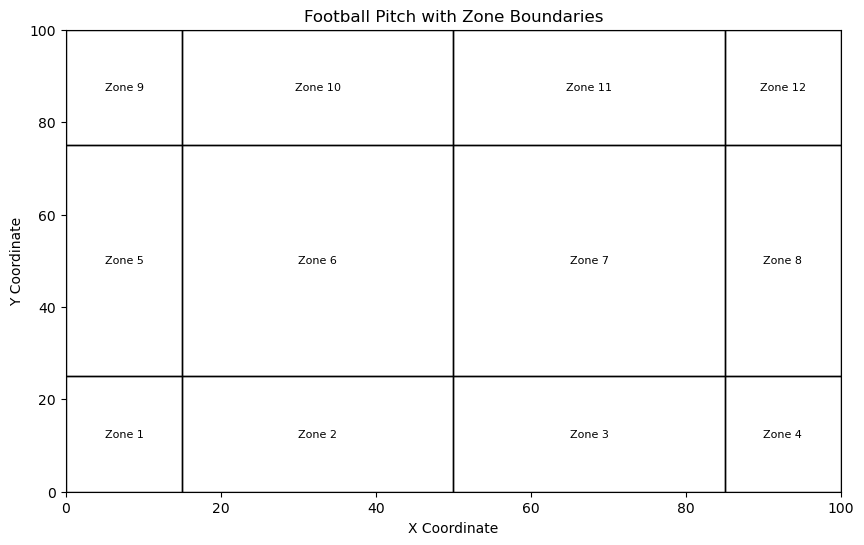

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot zone boundaries
for i in range(len(x_boundaries) - 1):
    for j in range(len(y_boundaries) - 1):
        x_start, x_end = x_boundaries[i], x_boundaries[i + 1]
        y_start, y_end = y_boundaries[j], y_boundaries[j + 1]

        # Create a rectangle patch for each zone
        rect = patches.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start,
                                 linewidth=1, edgecolor='black', facecolor='none')

        # Add the rectangle to the plot
        ax.add_patch(rect)

        # Add zone name inside the rectangle
        zone_name = zone_names[i + j * (len(x_boundaries) - 1)]
        plt.text((x_start + x_end) / 2, (y_start + y_end) / 2, zone_name,
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=8, color='black')

# Customize the plot
plt.title('Football Pitch with Zone Boundaries')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(0, 100)
plt.ylim(0, 100)

# Show the plot
plt.show()


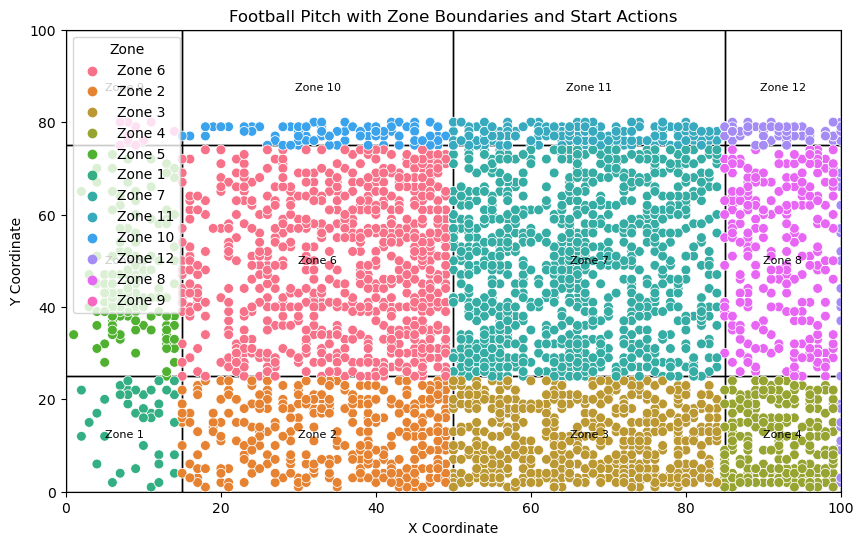

In [54]:
# Visualizing Start Actions
fig, ax = plt.subplots(figsize=(10, 6))

# Plot zone boundaries
for i in range(len(x_boundaries) - 1):
    for j in range(len(y_boundaries) - 1):
        x_start, x_end = x_boundaries[i], x_boundaries[i + 1]
        y_start, y_end = y_boundaries[j], y_boundaries[j + 1]

        # Create a rectangle patch for each zone
        rect = patches.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start,
                                 linewidth=1, edgecolor='black', facecolor='none')

        # Add the rectangle to the plot
        ax.add_patch(rect)

        # Add zone name inside the rectangle
        zone_name = zone_names[i + j * (len(x_boundaries) - 1)]
        plt.text((x_start + x_end) / 2, (y_start + y_end) / 2, zone_name,
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=8, color='black')

# Plot actions with starting and ending points
sns.scatterplot(x='start_X', y='start_Y', data=df, hue='zoneStart', marker='o', s=50, ax=ax)
# sns.scatterplot(x='end_X', y='end_Y', data=df, hue='zoneEnd', marker='X', s=50, ax=ax)

# Customize the plot
plt.title('Football Pitch with Zone Boundaries and Start Actions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend(title='Zone')

# Show the plot
plt.show()

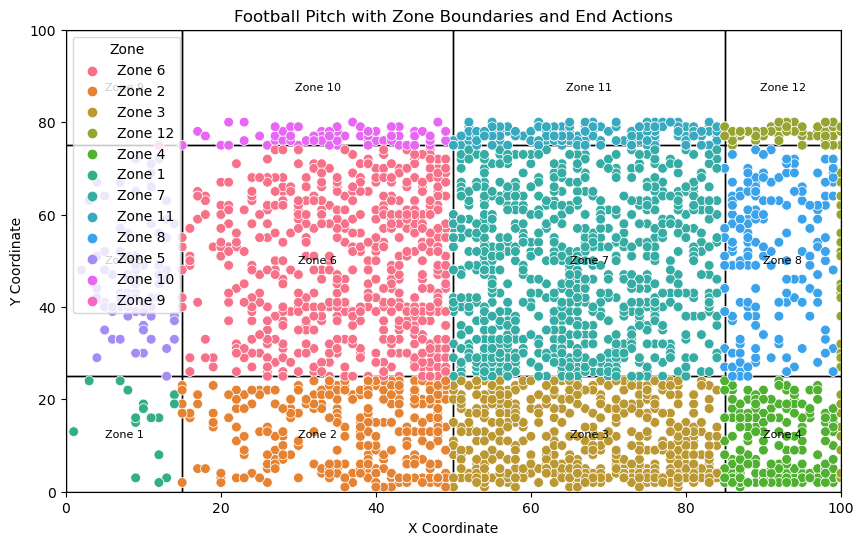

In [60]:
# Visualizing End Actions
fig, ax = plt.subplots(figsize=(10, 6))

# Plot zone boundaries
for i in range(len(x_boundaries) - 1):
    for j in range(len(y_boundaries) - 1):
        x_start, x_end = x_boundaries[i], x_boundaries[i + 1]
        y_start, y_end = y_boundaries[j], y_boundaries[j + 1]

        # Create a rectangle patch for each zone
        rect = patches.Rectangle((x_start, y_start), x_end - x_start, y_end - y_start,
                                 linewidth=1, edgecolor='black', facecolor='none')

        # Add the rectangle to the plot
        ax.add_patch(rect)

        # Add zone name inside the rectangle
        zone_name = zone_names[i + j * (len(x_boundaries) - 1)]
        plt.text((x_start + x_end) / 2, (y_start + y_end) / 2, zone_name,
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=8, color='black')

# Plot actions with starting and ending points
# sns.scatterplot(x='start_X', y='start_Y', data=df, hue='zoneStart', marker='o', s=50, ax=ax)
sns.scatterplot(x='end_X', y='end_Y', data=df, hue='zoneEnd', marker='o', s=50, ax=ax)

# Customize the plot
plt.title('Football Pitch with Zone Boundaries and End Actions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend(title='Zone')

# Show the plot
plt.show()

Number of actions for each startZone:
Zone 7     1054
Zone 6      810
Zone 12     617
Zone 3      584
Zone 2      372
Zone 8      279
Zone 4      247
Zone 11     197
Zone 5      169
Zone 10     110
Zone 1       38
Zone 9       10
Name: zoneStart, dtype: int64

Number of actions for each endZone:
Zone 12    1416
Zone 7      870
Zone 6      588
Zone 3      536
Zone 2      303
Zone 4      220
Zone 11     190
Zone 8      184
Zone 5       91
Zone 10      71
Zone 1       17
Zone 9        1
Name: zoneEnd, dtype: int64


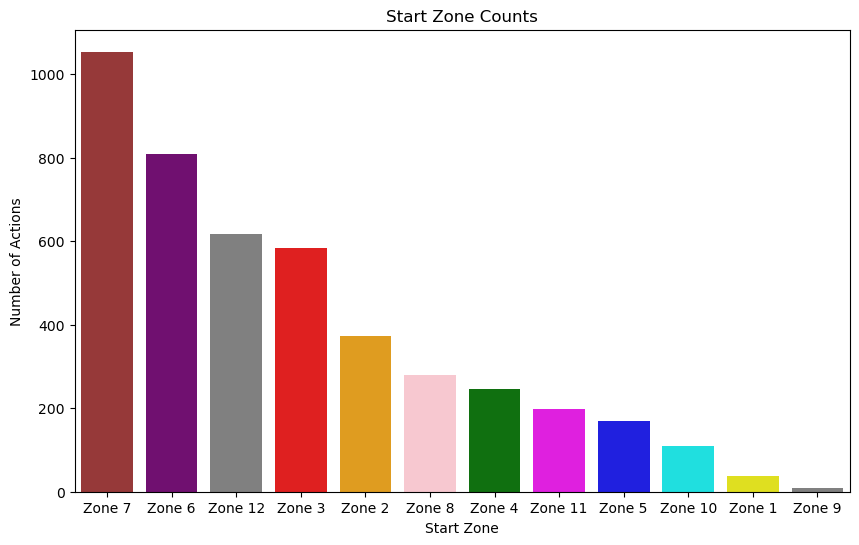

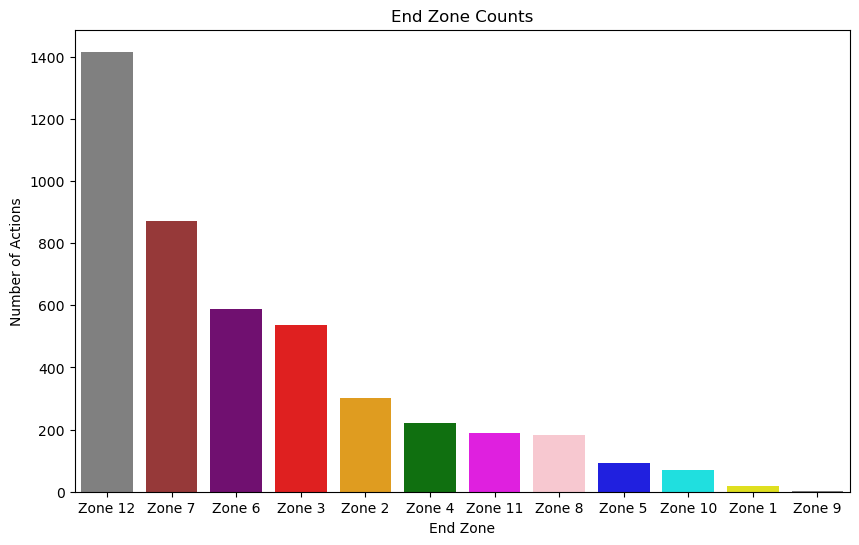

In [67]:
# Count the number of actions for each startZone and endZone
start_zone_counts = df['zoneStart'].value_counts()
end_zone_counts = df['zoneEnd'].value_counts()

# Print the counts
print("Number of actions for each startZone:")
print(start_zone_counts)

print("\nNumber of actions for each endZone:")
print(end_zone_counts)

zone_colors = {
    'Zone 1': 'yellow',
    'Zone 2': 'orange',
    'Zone 3': 'red',
    'Zone 4': 'green',
    'Zone 5': 'blue',
    'Zone 6': 'purple',
    'Zone 7': 'brown',
    'Zone 8': 'pink',
    'Zone 9': 'gray',
    'Zone 10': 'cyan',
    'Zone 11': 'magenta',
    'Zone 12': 'grey'
}

start_zone_colors = start_zone_counts.index.map(zone_colors)


# Visualize the start_zone_counts in a histogram
plt.figure(figsize=(10, 6))
sns.barplot(x=start_zone_counts.index, y=start_zone_counts.values, palette=start_zone_colors)
plt.title('Start Zone Counts')
plt.xlabel('Start Zone')
plt.ylabel('Number of Actions')
plt.show()

end_zone_colors = end_zone_counts.index.map(zone_colors)


plt.figure(figsize=(10, 6))
sns.barplot(x=end_zone_counts.index, y=end_zone_counts.values, palette=end_zone_colors)
plt.title('End Zone Counts')
plt.xlabel('End Zone')
plt.ylabel('Number of Actions')
plt.show()

In [68]:

df.to_csv("croatia_with_zones.csv", index=False)